In [1]:
!pip install qiskit numpy jupyterlab matplotlib qiskit-ibmq-provider

     |████████████████████████████████| 6.4MB 9.8MB/s 
     |████████████████████████████████| 92kB 6.9MB/s 
     |████████████████████████████████| 1.6MB 58.4MB/s 
     |████████████████████████████████| 17.3MB 136kB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 983kB 59.0MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 5.3MB 37.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 563kB 50.0MB/s 
     |████████████████████████████████| 21.7MB 112kB/s 
     |████████████████████████████████| 2.3MB 44.7MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.13.0-cp36-none-any.whl size=1399 sha256=a0aa878b4eb3a6b53a9c8b2130833d269ae3ff5ddab885b6f8d7696e13f77e40
  Stored in directory

In [3]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

# currently: 0,0
circuit.x(0)
# 1, 0
circuit.cx(0, 1) # cnot, controlled not. Flips 2nd qubit only IF first qubit is 1
# 1, 1
circuit.measure([0, 1], [0, 1])

circuit.draw()

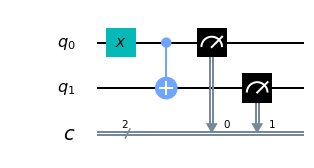

In [4]:
circuit.draw(output='mpl')

In [0]:
from qiskit import IBMQ

IBMQ.save_account("7076ea709f3324ea7bd9afd88f14ef14d55ad6159cf21b71e5b9d684cf022a5048b4faa36272baa103ccafa01efd8cc3e7f12f68d34f7dd42764bb89f042135f")

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
  try:
    qubit_count = len(backend.properties().qubits)
  except:
    qubit_count = "simulated"

  print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 9 queued and 5 qubits
ibmq_16_melbourne has 16 queued and 14 qubits
ibmq_vigo has 13 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_london has 38 queued and 5 qubits
ibmq_burlington has 2 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits


In [13]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


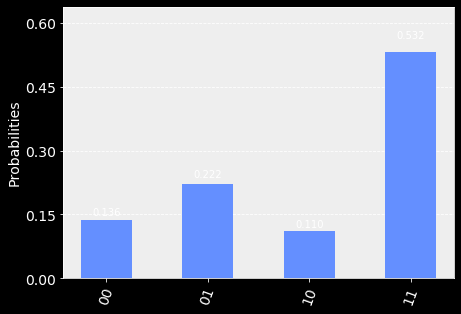

In [14]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [15]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

# currently: 0,0
circuit.h(0)
# 1, 0
circuit.cx(0, 1) # cnot, controlled not. Flips 2nd qubit only IF first qubit is 1
# 1, 1
circuit.measure([0, 1], [0, 1])

circuit.draw()

In [16]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


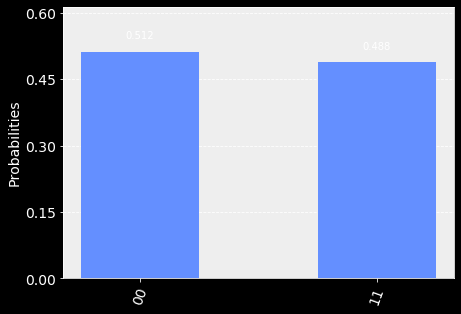

In [17]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])